In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import TIRE.simulate as simulate

## Generate data

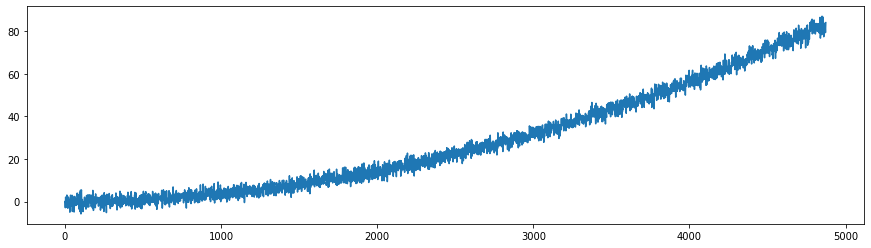

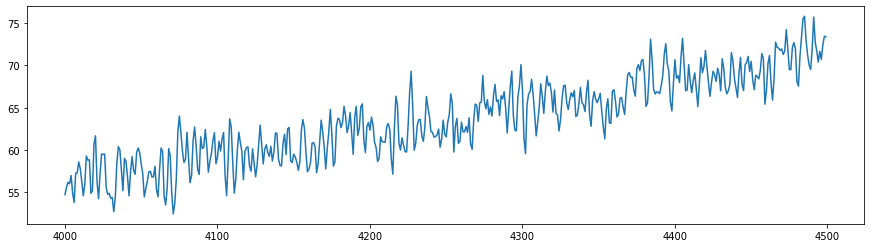

In [2]:
window_size = 20
timeseries, windows_TD, parameters = simulate.generate_jumpingmean(window_size)

plt.figure(figsize=(15,4))
plt.plot(timeseries)
plt.show()
plt.figure(figsize=(15,4))
plt.plot(range(4000,4500),timeseries[4000:4500])
plt.show()

In [3]:
window_size = 20
nfft = 30
import TIRE.utils as utils
timeseries, windows_TD, parameters = simulate.generate_jumpingmean(window_size)
print(windows_TD.shape)

norm_mode = 'timeseries'
windows_FD = utils.calc_fft(windows_TD, nfft, norm_mode)
print(windows_FD.shape)

(4892, 20)
(4892, 16)


## Train the model

In [4]:
from TIRE import TIRE
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = TIRE().to(device)

In [5]:
model.fit(timeseries)

Loss:   0%|          | 0/200 [00:00<?, ?it/s]

Training autoencoder for original timeseries


Loss: 0.83:   0%|          | 0/200 [00:00<?, ?it/s]

Training autoencoder for FFT timeseries


Loss: 0.00: 100%|██████████| 200/200 [04:25<00:00,  1.33s/it]


## Postprocessing and peak detection

In [6]:
dissimilarities, change_point_scores = model.predict(timeseries)

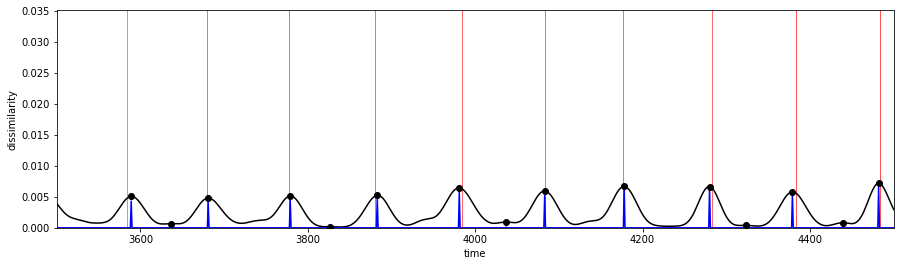

[0.46873477877124176, 0.8497159561440417, 0.9245476909363439]


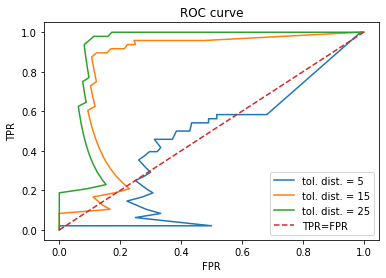

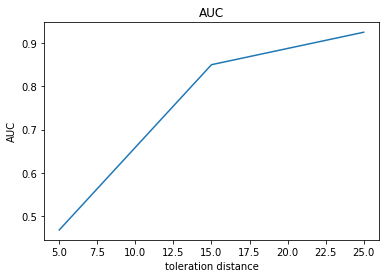

In [7]:
#parameters for plot
time_start = 3500
time_stop = 4500
plot_prominences = True

utils.plot_cp(dissimilarities, parameters, window_size, time_start, time_stop, plot_prominences)

#parameters for AUC calculation
tol_distances = [5,15,25]
auc = utils.get_auc(dissimilarities,tol_distances, parameters, window_size)